Particle Swarm Optimization

In [192]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt



In [193]:
def objective_function(x, y):
    val = ((1*1.38 * pow(10,-23) *x)/(1.6 * pow(10,-19)) ) *(math.log(2.54/1e-11)+math.log(y))
    
    return val;



In [194]:
store = []

def pso(max_iterations, population_size, c1, c2, w):
    # Initialize particles
    particles = []
    for i in range(population_size):
        
        # x = random.uniform(2, 10)
        # y = random.uniform(2, 10)
        x = random.uniform(283,303)
        y = random.uniform(500,1000)


        particles.append((x, y))


    # Initialize velocities and personal bests
    store.append(particles)
    velocities = [(0, 0) for _ in range(population_size)]


    personal_bests = [(particles[i][0], particles[i][1]) for i in range(population_size)]
    max = float('-inf')
    global_best = float('-inf'),float('-inf')
    for i in range(population_size):
        if objective_function(particles[i][0],particles[i][1])>max:
            max = objective_function(particles[i][0],particles[i][1])
            global_best = particles[i][0],particles[i][1]


    # Initialize global best


    # Run PSO for max_iterations
    for iteration in range(max_iterations):

        for i,particle in enumerate(particles):

            fitness = objective_function(*particle)

            # Update personal best
            if fitness > objective_function(*personal_bests[i]):
                personal_bests[i] = particle

            # Update global best
            if fitness > objective_function(*global_best):
                global_best = particle
        temp = []
        for i, particle in enumerate(particles):

            # Evaluate particle fitness
            

            # Update velocity
            vx, vy = velocities[i]
            px, py = particle
            pbx, pby = personal_bests[i]
            gbx, gby = global_best
            new_vx =  vx + c1 * random.uniform(0,1) * (pbx - px) + c2 * random.uniform(0,1) * (gbx - px)
            new_vy =  vy + c1 * random.uniform(1,2)  * (pby - py) + c2 *random.uniform(1,2) * (gby - py)
            velocities[i] = (new_vx, new_vy)

            # Update particle position
            new_x = px + new_vx
            new_y = py + new_vy
            temp.append((new_x,new_y))
            particles[i] = (new_x, new_y)
        store.append(temp)

    return global_best



In [195]:

max_iterations = 5
population_size = 3
c1 = 0.4
c2 = 0.6
w = 0
best_solution = pso(max_iterations, population_size, c1, c2, w)



print("The maximum of solar cell is at x = {}, y = {}".format(*best_solution))
print(objective_function(*best_solution))


The maximum of solar cell is at x = 311.06788027046673, y = 603.4737448601238
0.876343497123399


In [196]:
# store

3
[314.7010616439849, 300.1683361499123, 303.80151752343045, 307.4346988969486, 311.06788027046673, 314.7010616439849] [592.1768560323238, 637.3644113435238, 626.0675225157238, 614.7706336879238, 603.4737448601238, 592.1768560323238]
3
[309.9787571248942, 300.51194960092903, 302.34024461857615, 304.2469766520973, 306.4261351270139, 309.9787571248942] [660.8156301063918, 646.4487324458698, 582.9754128103593, 697.3099666099411, 755.4329006606224, 660.8156301063918]
3
[308.1480582946818, 302.8364533434793, 302.8364533434793, 303.0964301567641, 304.963290937276, 308.1480582946818] [582.415470678461, 634.6374323843893, 634.6374323843893, 627.4391461134796, 606.4028377809881, 582.415470678461]


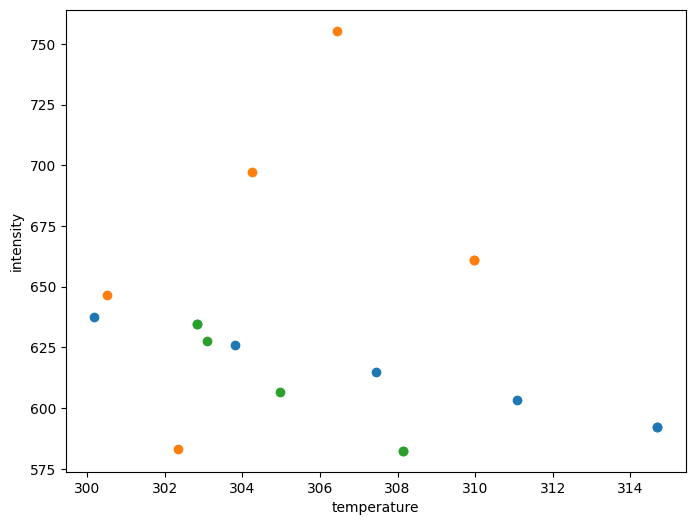

In [197]:
fig = plt.figure(figsize=(8, 6))
for j  in range(0,population_size):
  print(population_size)
  x =[]
  y =[]
  for i in range(0,max_iterations+1):
    x.append(store[i][j][0])
    y.append(store[i][j][1])
   
  # print(x,y)
  plt.scatter(x,y)
  plt.xlabel('temperature')
  plt.ylabel('intensity')
plt.show()





**Variations**




In [198]:
results = []
temp = 2
iterations = []
for i in range(15):
    
  iterations.append(temp)
  result = pso(temp, population_size, c1, c2, w)
  results.append(objective_function(*result))
  temp+=1

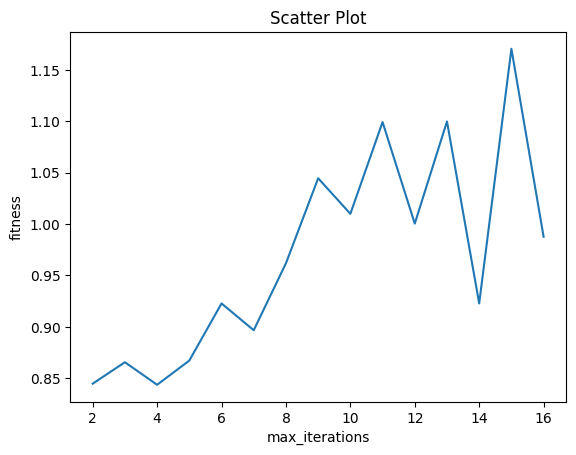

In [199]:
x = iterations
y = results


plt.plot(x, y)


plt.xlabel('max_iterations')
plt.ylabel('fitness')
plt.title('Scatter Plot')


plt.show()